In [ ]:
!pip install langgraph langsmith langchain langchain_groq langchain_community python-dotenv

In [17]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [18]:
groq_api_key = os.getenv("GROQ_API_KEY")
langsmith_api_key = os.getenv("LANGSMITH_API_KEY")

In [19]:
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph_Agent"

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(api_key=groq_api_key, model="Gemma2-9b-It")

# Graph state

In [22]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages

In [23]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [24]:
graph_builder = StateGraph(State)

In [25]:
def agent(state: State):
    return {"messages": llm.invoke(state["messages"])}

In [26]:
graph_builder.add_node("agent", agent)

In [27]:
graph_builder.add_edge(START, "agent")
graph_builder.add_edge("agent", END)

graph = graph_builder.compile()

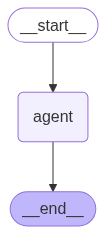

In [28]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [31]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value["messages"])
            print("Assistant:", value["messages"].content)

dict_values([{'messages': AIMessage(content="As a large language model, I don't have feelings or experiences like humans do. However, I'm here and ready to assist you with any questions or tasks you may have!\n\nHow can I help you today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 15, 'total_tokens': 64, 'completion_time': 0.089090909, 'prompt_time': 0.001919046, 'queue_time': 0.249846484, 'total_time': 0.091009955}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--96f5d75d-3f9f-4379-bb14-e94b091fe45a-0', usage_metadata={'input_tokens': 15, 'output_tokens': 49, 'total_tokens': 64})}])
content="As a large language model, I don't have feelings or experiences like humans do. However, I'm here and ready to assist you with any questions or tasks you may have!\n\nHow can I help you today?\n" additional_kwargs={} response_metadata={'token_usage': {'completion_tok